# Exercise 1

- Implement the Griewank benchmark function

$$f(x) = 1 + \frac{1}{4000}*(\sum_{i=1}^n x_i^2) - \Pi_{i=1}^n\cos (\frac{x_i}{\sqrt{i}})$$

- Implement a genetic algorithm to solve the problem
$$\arg\min_{x \in [-600,600]^n} f(x)$$

# Exercise 2

Revisit Exercise 1 by:

- Check how the solution varies when changing elements that influence the exploration-exploitation trade-off (elitism, steady-state vs generational, population size, mutation rate, etc.)

- Implement a maximally exploitative version of Genetic Algorithm (Hint: Hill Climbing)

- Implement a maximally explorative version of Genetic Algorithm (Hint: Randomized Search)

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../source/")
from evolutionary import *
from functools import partial
import scipy

In [8]:
def griewank(x: FloatVectorCandidate):
    return - (1 + 1/4000*np.sum(x.candidate**2) - np.product(np.cos(x.candidate/np.sqrt(np.array(range(len(x.candidate)))+1))))

In [9]:
max_value = 10

genalgo_griewank = GeneticAlgorithm(100,
                                  FloatVectorCandidate,
                                  partial(tournament_selection, tournament_size=5),
                                  griewank,
                                  elitism=True,
                                  **{"distribution": scipy.stats.uniform(loc=-600, scale=1200),
                                     "size": max_value,
                                     "lower": -600,
                                     "upper": 600})

(0.0, 5.066895022638514)

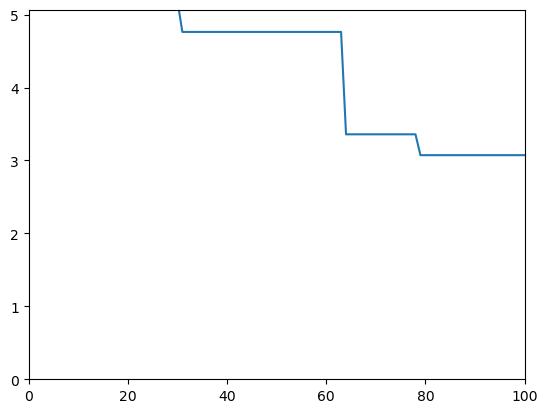

In [12]:
iters = 100

genalgo_griewank.fit(iters, keep_history=True)
history = genalgo_griewank.fitness_h
plt.plot(-history)
plt.xlim(0,iters)
plt.ylim(0,np.sum(a))

In [11]:
history

array([-120.74475004,  -29.31757462,  -19.75279651,  -13.02472785,
         -8.53922139,   -8.53922139,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.64674417,   -3.64674417,   -3.64674417,   -3.64674417,
         -3.2342187 ,   -3.2342187 ,   -3.2342187 ,   -3.23421